# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [26]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [27]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())

# TODO: retain only anual_income and spending_score for clustering
shopping_data_clustering = shopping_data.iloc[:,3:]
#display(shopping_data_clustering.head())


,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

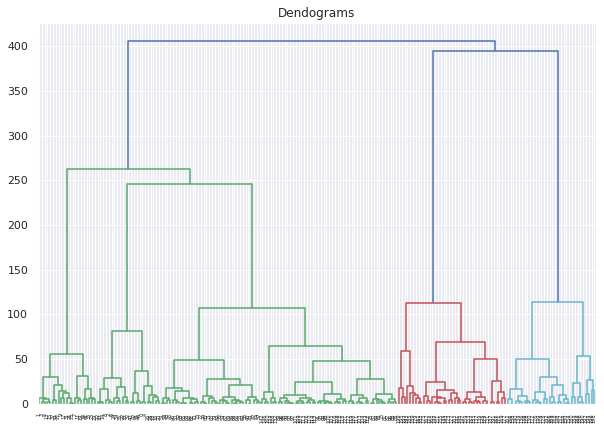

In [28]:
# TODO
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(shopping_data_clustering, method='ward'))  
# 5 clusters 

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

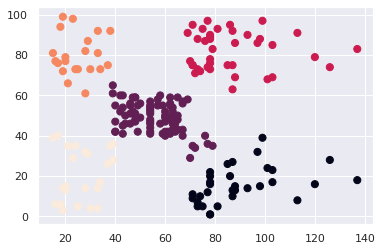

In [29]:
# TODO
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(shopping_data_clustering)  

plt.scatter(shopping_data_clustering.iloc[:,0], shopping_data_clustering.iloc[:,1], c=y_ward, s=50)

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

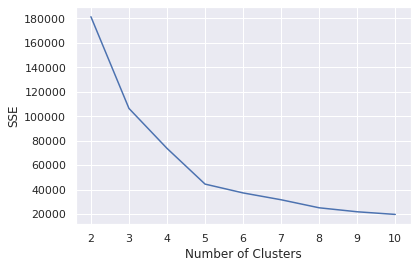

In [30]:
# TODO
from sklearn.cluster import KMeans

sse = []
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(shopping_data_clustering)
   sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#based on elbow point, 5 clusters make the most sense

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

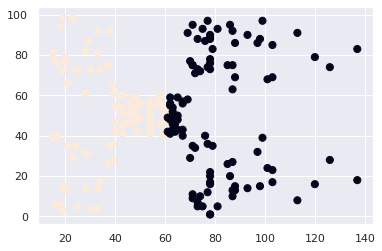

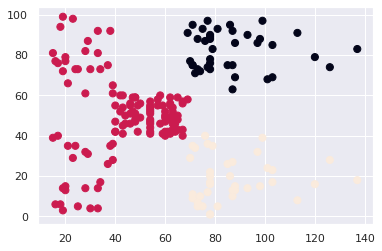

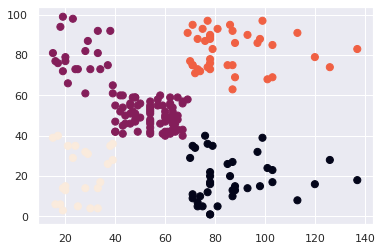

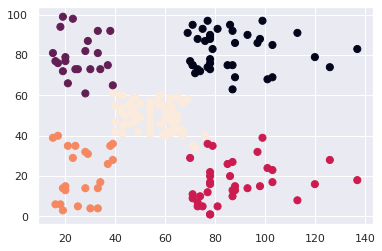

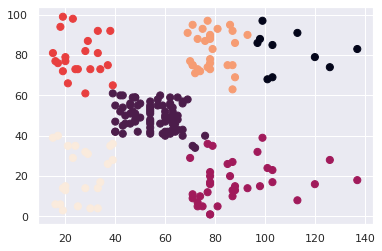

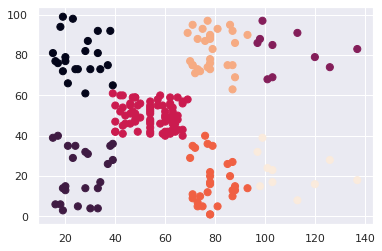

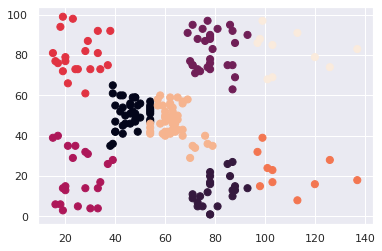

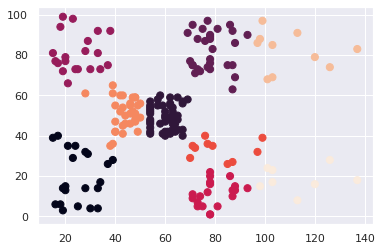

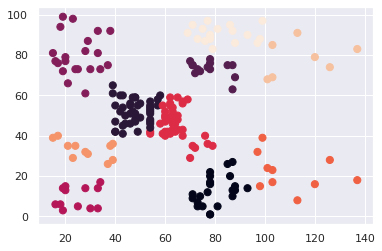

In [31]:
# TODO
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(shopping_data_clustering)
   y_kmeans = kmeans.predict(shopping_data_clustering)
   plt.scatter(shopping_data_clustering.iloc[:, 0], shopping_data_clustering.iloc[:, 1], c=y_kmeans,s=50)
   plt.show()


## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

In [32]:
#1. 	Use the K-means algorithm with K= 3 to cluster the data
'''
a) initial partition: 17, 80, 167. Assign other numbers to the closest center
cluster 1: 17,28,50, mean = 31.7
cluster 2: 60,80,89, mean = 76.3
cluster 3: 150, 167, 171, 189, mean = 169.25
b) reevaluate each number to the clusters mean
c) each number is assigned with its clostest cluster. the final assignment is:
cluster 1: [17,28,50]
cluster 2: [60,80,89]
cluster 3: [150, 167, 171, 189]
'''

'\na) initial partition: 17, 80, 167. Assign other numbers to the closest center\ncluster 1: 17,28,50, mean = 31.7\ncluster 2: 60,80,89, mean = 76.3\ncluster 3: 150, 167, 171, 189, mean = 169.25\nb) reevaluate each number to the clusters mean\nc) each number is assigned with its clostest cluster. the final assignment is:\ncluster 1: [17,28,50]\ncluster 2: [60,80,89]\ncluster 3: [150, 167, 171, 189]\n'

In [33]:
#2. Use hierarchical agglomerative clustering with single linkage to cluster the data
'''
a) find closet distance for each number and its neighbor. 
17 (11) 28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (17) 167 (4) 171 (17) 189 

b) minimum value is 4, between 167 and 171. the updated distance for the numbers are:
17 (11)28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (17) [167,171] (17) 189
  clusters are: 17 28 50 60 80 89 150 [167, 171] 189 

c) minimum value is 9. update the distance list with 8 clusters:
17 (11)28 (22) 50(10) 60 (20) [80,89] (61) 150  (17) [167,171] (17) 189
  clusters are: 17 28 50 60 [80, 89] 150 [167, 171] 189 

d) minimum value is 10. update the distance list with 7 clusters:
17 (11) 28 (22) [50,60] (20) [80,89] (61) 150  (17) [167,171] (17) 189
  clusters are: 17 28 [50,60] [80, 89] 150 [167, 171] 189 

e) minimum value is 11. update the distance list with 6 clusters:
[17,28] (22) [50,60] (20) [80,89] (61) 150  (17) [167,171] (17) 189
  clusters are: [17,28] [50,60] [80, 89] 150 [167, 171] 189 

f) minimum value is 17. update the distance list with 5 clusters:
[17,28] (22) [50,60] (20) [80,89] (61) [150,167,171] (17) 189
  clusters are: [17,28] [50,60] [80, 89] [150,167,171] 189 

g) minimum value is 17. update the distance list with 4 clusters: 
[17,28] (22) [50,60] (20) [80,89] (61) [150,167,171,189]
  clusters are: [17,28] [50,60] [80, 89] [150,167,171,189]

h) minimum value is 20. update the distance list with 3 clusters:
[17,28] (22) [50,60, 80,89] (61) [150,167,171,189]
  clusters are: [17,28] [50,60, 80,89] [150,167,171,189]

i) minimum value is 22. update the distance list with 2 clusters:
[17,28,50,60, 80,89] (61) [150,167,171,189]
  clusters are: [17,28,50,60, 80,89] [150,167,171,189]

'''

'\na) find closet distance for each number and its neighbor. \n17 (11) 28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (17) 167 (4) 171 (17) 189 \n\nb) minimum value is 4, between 167 and 171. the updated distance for the numbers are:\n17 (11)28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (17) [167,171] (17) 189\n  clusters are: 17 28 50 60 80 89 150 [167, 171] 189 \n\nc) minimum value is 9. update the distance list with 8 clusters:\n17 (11)28 (22) 50(10) 60 (20) [80,89] (61) 150  (17) [167,171] (17) 189\n  clusters are: 17 28 50 60 [80, 89] 150 [167, 171] 189 \n\nd) minimum value is 10. update the distance list with 7 clusters:\n17 (11) 28 (22) [50,60] (20) [80,89] (61) 150  (17) [167,171] (17) 189\n  clusters are: 17 28 [50,60] [80, 89] 150 [167, 171] 189 \n\ne) minimum value is 11. update the distance list with 6 clusters:\n[17,28] (22) [50,60] (20) [80,89] (61) 150  (17) [167,171] (17) 189\n  clusters are: [17,28] [50,60] [80, 89] 150 [167, 171] 189 \n\nf) minimum value is 17. update the di

In [34]:
#2. Use hierarchical agglomerative clustering with complete linkage to cluster the data
'''
a) find closet distance for each number and its neighbor. 
17 (11) 28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (17) 167 (4) 171 (17) 189 

b) minimum value is 4, between 167 and 171. the updated distance for the numbers are:
17 (11) 28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (21) [167,171] (21) 189
  clusters are: 17 28 50 60 80 89 150 [167, 171] 189 

c) minimum value is 9. update the distance list with 8 clusters:
17 (11)28 (22) 50(10) 60 (29) [80,89] (70) 150  (21) [167,171] (21) 189
  clusters are: 17 28 50 60 [80, 89] 150 [167, 171] 189 

d) minimum value is 10. update the distance list with 7 clusters:
17 (11) 28 (32) [50,60] (39) [80,89] (70) 150  (21) [167,171] (21) 189
  clusters are: 17 28 [50,60] [80, 89] 150 [167, 171] 189 

e) minimum value is 11. update the distance list with 6 clusters:
[17,28] (43) [50,60] (39) [80,89] (70) 150  (21) [167,171] (21) 189
  clusters are: [17,28] [50,60] [80, 89] 150 [167, 171] 189 

f) minimum value is 21. update the distance list with 5 clusters:
[17,28] (43) [50,60] (39) [80,89] (91) [150,167,171] (39) 189
  clusters are: [17,28] [50,60] [80, 89] [150,167,171] 189 

g) minimum value is 39. update the distance list with 4 clusters: 
[17,28] (43) [50,60] (39) [80,89] (109) [150,167,171,189]
  clusters are: [17,28] [50,60] [80, 89] [150,167,171,189]

h) minimum value is 39. update the distance list with 3 clusters:
[17,28] (72) [50,60,80,89] (139) [150,167,171,189]
  clusters are: [17,28] [50,60, 80,89] [150,167,171,189]

i) minimum value is 72. update the distance list with 2 clusters:
[17,28,50,60,80,89] (172) [150,167,171,189]
  clusters are: [17,28,50,60, 80,89] [150,167,171,189]
'''

'\na) find closet distance for each number and its neighbor. \n17 (11) 28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (17) 167 (4) 171 (17) 189 \n\nb) minimum value is 4, between 167 and 171. the updated distance for the numbers are:\n17 (11) 28 (22) 50(10) 60 (20) 80 (9) 89 (61) 150  (21) [167,171] (21) 189\n  clusters are: 17 28 50 60 80 89 150 [167, 171] 189 \n\nc) minimum value is 9. update the distance list with 8 clusters:\n17 (11)28 (22) 50(10) 60 (29) [80,89] (70) 150  (21) [167,171] (21) 189\n  clusters are: 17 28 50 60 [80, 89] 150 [167, 171] 189 \n\nd) minimum value is 10. update the distance list with 7 clusters:\n17 (11) 28 (32) [50,60] (39) [80,89] (70) 150  (21) [167,171] (21) 189\n  clusters are: 17 28 [50,60] [80, 89] 150 [167, 171] 189 \n\ne) minimum value is 11. update the distance list with 6 clusters:\n[17,28] (43) [50,60] (39) [80,89] (70) 150  (21) [167,171] (21) 189\n  clusters are: [17,28] [50,60] [80, 89] 150 [167, 171] 189 \n\nf) minimum value is 21. update the d

In [35]:
#4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189
'''
17 28 50 60 80 89 150 167 171 189 
a) initial partition: 150, 171, 189. Assign other numbers to the closest center
cluster 1: 17 28 50 60 80 89 150, mean = 67
cluster 2: 167,171, mean = 169
cluster 3: 189, mean = 189

b) reevaluate each number to the clusters mean. Assign numbers to the closest center. calculate new means
cluster 1: mean = 67, assign 17 28 50 60 80 89, new mean = 54
cluster 2: mean = 169, assign 150 167 171, new mean = 162.7
cluster 3: mean = 189, assign 189, new mean = 189

c) each number is assigned with its clostest cluster. the final assignment is:
cluster 1: [17,28,50,60,80,89]
cluster 2: [150, 167, 171]
cluster 3: [189]

'''

'\n17 28 50 60 80 89 150 167 171 189 \na) initial partition: 150, 171, 189. Assign other numbers to the closest center\ncluster 1: 17 28 50 60 80 89 150, mean = 67\ncluster 2: 167,171, mean = 169\ncluster 3: 189, mean = 189\n\nb) reevaluate each number to the clusters mean. Assign numbers to the closest center. calculate new means\ncluster 1: mean = 67, assign 17 28 50 60 80 89, new mean = 54\ncluster 2: mean = 169, assign 150 167 171, new mean = 162.7\ncluster 3: mean = 189, assign 189, new mean = 189\n\nc) each number is assigned with its clostest cluster. the final assignment is:\ncluster 1: [17,28,50,60,80,89]\ncluster 2: [150, 167, 171]\ncluster 3: [189]\n\n'

## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [7]:
# Load the Relevant libraries
import sklearn as sk
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

aaai_data_clustering = aaai_data.iloc[:,5]
display(aaai_data_clustering.head())

# TODO: retain only anual_income and spending_score for clustering
#shopping_data_clustering = shopping_data.iloc[:,3:]
# TODO

0    Transfer learning considers related but distin...
1    Transfer learning uses relevant auxiliary data...
2    The probabilistic serial (PS) rule is one of t...
3    As the rapid growth of online social media att...
4    In this paper, we study the low-rank tensor co...
Name: abstract, dtype: object

In [8]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(aaai_data_clustering)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,'crowd-sourc,'intrins,'mostli,'s,0,0.05,0.27,0.39,0.90,1,1-approv,1-dimension,1-euclidean,1-veto,1.0,1.5,1.6,1.68,1/e,1/t,1/ε,10,100,10kwh,10x,12,13,13.9,15,16,16-60,16.9,165,17,18,1984,1996,1999,1:26,1−ε,...,work,worker,workload,world,worldwid,wormhol,wors,worst,worst-cas,worthwhil,wpm,wrapper,write,writer,written,wrongli,wrt,x=x,xiao,xinfap,xml,xor,y=i,yale,yannakaki,year,yes/no,yield,york,zeitgeist,zero,zero-sum,zurich,–,—,’,“,”,ℓ1-regular,ﬁxed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.053638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.103199,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03918,0.0,0.0,0.057274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.060785,0.0,0.0,0.0,0.0
394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.04763,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409454,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


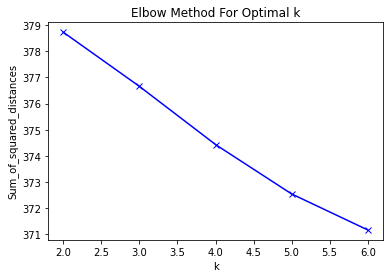

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,7)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(matrix)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# number 4 and 5 look like an elbow point. 
#if go with 4 clusters
number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)
km.fit
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_words)))
'''
if go with 4 clusters, based on top words for each cluster, these clustering makes sense: 
cluster 0: related to user and language
cluster 1: related to search and constraint
cluster 2: doesn't make much sense as the words are all very general
cluster 3: related to gaming and social networking
'''

Top terms per cluster:
Cluster 0: game agent rule mechan prefer score vote energi elect voter
Cluster 1: learn algorithm model data method thi propos approach problem use
Cluster 2: user model social data recommend activ predict inform network method
Cluster 3: plan problem search heurist robot bound algorithm thi planner action


"\nbased on top words for each cluster, these clustering makes sense: \ncluster 0: related to user and language\ncluster 1: related to search and constraint\ncluster 2: doesn't make much sense as the words are all very general\ncluster 4: related to gaming and social networking\n"

In [11]:
#if go with 5 clusters
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)
km.fit
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_words)))
'''
if go with 5 clusters, based on top words for each cluster, these clustering makes sense: 
cluster 0: related to social netsork
cluster 1: related to language
cluster 2: related to agent and gaming
cluster 3: related to search and optimize in contraints
cluster 4: related to classification
'''

Top terms per cluster:
Cluster 0: model user method social propos predict algorithm network thi data
Cluster 1: languag ontolog logic function model problem thi use semant algorithm
Cluster 2: agent game mechan task thi rule algorithm problem alloc time
Cluster 3: problem algorithm plan constraint search thi solv optim bound use
Cluster 4: learn data label featur method propos domain approach classif imag
